In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from sympy import sin, cos, symbols, lambdify, exp
from typing import *
from cmath import sqrt 
Num = Union[float, complex]  #Definimos la estructura Num la cual es la union de flotantes y complejos
Func = Callable[[Num], Num]  #Definimos la estructura Func la cual es una funcion que recibe y regresa argumentos de tipo Num
class metodos_numericos:
  def __init__(self,fun,funsymb=None) -> None:
      """
      CONSTRUCTOR
      Recibe los siguientes parámetros y crea un objeto metodos_numericos:
      fun - función lambda (Debe ser un objeto callable normal o Func de querer usarse el método de Müller)
      funsymb - función simbólica (OPCIONAL, Usarse en caso de requerir del método de Newton)
      """
      self.fun=fun
      self.funsymb=funsymb
  def graficar(self,a: np.float64,b: np.float64,N: int):
    """
    Método Graficador
    Recibe los siguientes parámetros y muestra una gráfica simple de la función atributo
    a - Punto inicial del intervalo
    b - Punto final del intervalo
    N - Cantidad de puntos en el intervalo los cuales graficar
    """
    x=np.linspace(a,b,N)
    y=self.fun(x)
    plt.grid()
    plt.plot(x,y)
  def biseccion(self,a: np.float64,b:np.float64,tol:np.float64)->pd.DataFrame:
    """
    Método de Bisección
    Recibe los siguientes parámetros y realiza el método de bisección sobre la función atributo:
    a - Punto inicial del intervalo
    b - Punto final del intervalo
    tol - Tolerancia deseada para el método
    Regresa:
    Data Frame de pandas con los puntos de los intervalos generados, los puntos medios, las imágenes y la distancia de los intervalos asi como la función evaluada en los puntos medios
    """
    A: list=[];B: list=[];C: list=[];fC:list=[];bk_ax:list=[];
    while(abs(b-a)>=tol):
      A.append(a);B.append(b)
      c=np.float64((b+a)/2.0)
      C.append(c)
      fC.append(self.fun(c))
      bk_ax.append(abs(b-a))
      if(self.fun(c)==0.0):
        break
      if(self.fun(c)*self.fun(a)<np.float64(0.0)):
        b=c
      else:
        a=c
    return pd.DataFrame(dict(ak = A, bk = B, ck= C, fCk=fC,Bk_Ak=bk_ax))
  def secante(self,x0:np.float64,x1:np.float64,tol:np.float64)->pd.DataFrame:
     """
     Método de la Secante
     Recibe los siguientes parámetros y realiza el método de la secante sobre la función atributo:
     x0 - Aproximación inicial
     x1 - Segunda aproximación inicial
     tol - Tolerancia deseada para el método
     Regresa:
     Data Frame de pandas con los puntos de aproximación de la secante como de las diferencias absolutas y la función evaluada en las aproximaciones 
     """
     X0: list=[];X1: list=[];X2: list=[];X1_X0: list=[];
     while(abs(x0-x1)>=tol):
       X1.append(x1);X0.append(x0);X1_X0.append(abs(x0-x1))
       x2 = x1 - self.fun(x1) * (x1 - x0) / float(self.fun(x1) - self.fun(x0))
       x0, x1 = x1, x2
       X2.append(x2)
     return pd.DataFrame(dict(Xn_1=X0, Xn=X1, Xnplus1=X2, Xn_Xn_1=X1_X0, fx2=[self.fun(x) for x in X2]))
  def regula_falsi(self,a: np.float64, b: np.float64 , tol: np.float64):
    """
    Método Regula Falsi
    Recibe los siguientes parámetros y aplica el método Regula Falsi sobre la función atributo:
    a - Punto inicial del intervalo
    b - Punto final del intervalo
    tol - Tolerancia deseada para el método
    Regresa:
    Data Frame de pandas con los puntos que delimitan los intervalos asi como el punto falso, la función evaluada en dicho punto y la longitud de los intervalos
    """
    A: list=[];B: list=[];C: list=[];fC:list=[];bk_ax:list=[];
    tramo=abs(b-a)
    fa=self.fun(a)
    fb=self.fun(b)
    while not(tramo<=tol):
      A.append(a);B.append(b)
      c=b-fb*(a-b)/(fa-fb)
      fc=self.fun(c)
      C.append(c)
      fC.append(fc)
      bk_ax.append(tramo)
      cambi=np.sign(fa)*np.sign(fc)
      if(cambi>0):
        tramo=abs(c-a)
        a=c
        fa=fc
      else:
        tramo=abs(b-c)
        b=c
        fb=fc
    return pd.DataFrame(dict(ak = A, bk = B, ck= C, fCk=fC,Bk_Ak=bk_ax))
  def newton_rhapson(self,x0: np.float64,tol: np.float64,x: symbols,alpha: np.float64 = None):
    """
    Método de Newton-Rhapson
    Recibe los siguientes parámetros y aplica el método de Newton-Rhapson sobre la función atributo
    NOTA: Requiere de la función simbólica con el fin de calcular la derivada cuya variable sea la variable simbólica de entrada.
    x0 - Aproximación inicial
    tol - Tolerancia deseada del método
    x - variable simbólica
    Regresa:
    Data Frame de pandas con los puntos como su siguiente calculados por la relación de recurrencia del método como la función evaluada en dichos puntos
    """
    if(self.funsymb==None):
        print("No se cuenta con una función simbólica")
        return None
    deriv=lambdify(x,self.funsymb.diff(x),'numpy')
    X1: list=[]; X0: list=[]; X0_X1: list=[]; fx0: list=[]
    while(True):
      x1=x0 - self.fun(x0)/deriv(x0)
      X0.append(x0);X1.append(x1);X0_X1.append(abs(x0-x1));fx0.append(self.fun(x0))
      if(abs(x0-x1)<=tol):
        break
      x0 = x1 
    if( alpha!=None):
       alpha_pn: list=[abs(alpha-z) for z in X0]
       col2=[(abs(X1[i]-X0[i])/abs(X0[i]-X0[i-1])**2)for i in range(1,len(X1)-1)]
       col2.append(0)
       col2.insert(0,0)
       col3=[(abs(alpha-X1[i]))/abs(alpha-X0[i])**2 for i in range(len(X1))]
       return pd.DataFrame(dict(X_0=X0,X_1=X1,X0__X1=X0_X1, FX0=fx0, alphapn=alpha_pn,col2=col2,col3=col3))
    else:
       return pd.DataFrame(dict(X_0=X0,X_1=X1,X0__X1=X0_X1, FX0=fx0))
  def punto_fijo(self,p0: np.float64, g, tol: np.float64):
    P0: list=[]
    Pn: list=[]
    fpn: list=[]
    gpn: list=[]
    while(True):
      pn=g(p0)
      P0.append(p0)
      Pn.append(pn)
      fpn.append(self.fun(pn))
      gpn.append(g(pn)) 
      if(abs(pn-p0)<tol):
        return pd.DataFrame(dict(p0=P0, pn=Pn, Fpn=fpn, Gpn=gpn))
      p0=pn
  def diferencia_dividida(self, xs: list[Num]):
    if(len(xs)==2):
      a,b=xs
      return (self.fun(a) - self.fun(b)) / (a - b)
    else:
      return (self.diferencia_dividida(xs[1:])-self.diferencia_dividida(xs[0:-1]))/(xs[-1] - xs [0])
  def muller(self, xs: tuple, tol: np.float64) -> pd.DataFrame:
    """
    Método de Müller
    Recibe los siguientes parámetros y aplica el método de Müller sobre la función argumento
    xs - Aproximaciones iniciales en forma de tupla
    tol - Tolerancia deseada del método
    Regresa:
    Data Frame de pandas con los puntos como su siguiente calculados por la relación de recurrencia del método como la función evaluada en dichos puntos
    """
    x0, x1, x2 = xs
    X0: list=[]
    X1: list=[]
    X2: list=[]
    X3: list=[]
    fX3: list=[]  
    while (True):
        w = self.diferencia_dividida((x2, x1)) + self.diferencia_dividida((x2, x0)) - self.diferencia_dividida((x2, x1))
        s_delta = sqrt(w ** 2 - 4 * self.fun(x2) * self.diferencia_dividida((x2, x1, x0)))
        denoms = [w + s_delta, w - s_delta]
        x3 = x2 - 2 * self.fun(x2) / max(denoms, key=abs)
        x0, x1, x2 = x1, x2, x3
        X0.append(x0);X1.append(x1);X2.append(x2),X3.append(x3);fX3.append(self.fun(x3))
        if(abs(self.fun(x3))<tol):
          break
    return pd.DataFrame(dict(x_1=X1,x_2=X2,x_3=X3,f_x3=fX3))  

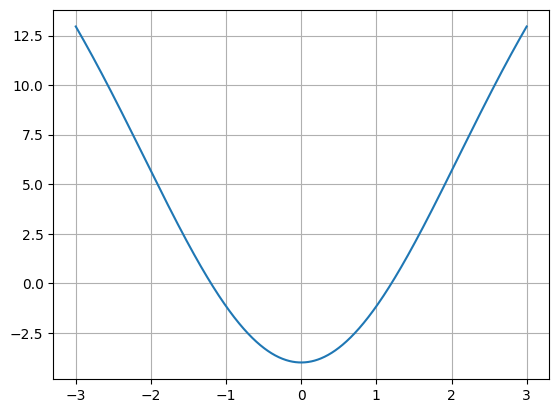

In [3]:
#Ejercicio 1
funcion_1 = lambda x: x**2 - 4*np.cos(x)
ejercicio1=metodos_numericos(funcion_1)
ejercicio1.graficar(-3,3,1000)

In [7]:
pd.set_option("display.precision", 40)
ejercicio1.regula_falsi(1,2,0.5*10**-8)

,ak,bk,ck,fCk,Bk_Ak
0,1.0000000000000000000000000000000000000000,2,1.1701206901819825034749555925372987985611,-0.1909797940472433008807229271042160689831,1.0000000000000000000000000000000000000000
1,1.1701206901819825034749555925372987985611,2,1.1971872707330051266438886159448884427547,-0.0266542037911488005619276009383611381054,0.1701206901819825034749555925372987985611
2,1.1971872707330051266438886159448884427547,2,1.2009471417390225056465169473085552453995,-0.0036252385747213011768508295062929391861,0.0270665805510226231689330234075896441936
3,1.2009471417390225056465169473085552453995,2,1.2014581947741178602484524162719026207924,-0.0004913069601746311576562220579944550991,0.0037598710060173790026283313636668026447
4,1.2014581947741178602484524162719026207924,2,1.2015274487370226630389424826717004179955,-0.0000665515204949507221954263513907790184,0.0005110530350953546019354689633473753929
5,1.2015274487370226630389424826717004179955,2,1.2015368296388957425335775042185559868813,-0.0000090143500819372945898066973313689232,0.0000692539629048027904900663997977972031
6,1.2015368296388957425335775042185559868813,2,1.2015381002725096237782054231502115726471,-0.0000012209755881897876861330587416887283,0.0000093809018730794946350215468555688858
7,1.2015381002725096237782054231502115726471,2,1.2015382723772398687600571065559051930904,-0.0000001653784882371667208644794300198555,0.0000012706336138812446279189316555857658
8,1.2015382723772398687600571065559051930904,2,1.2015382956884508303119218908250331878662,-0.0000000224001515114480298507260158658028,0.0000001721047302449818516834056936204433
9,1.2015382956884508303119218908250331878662,2,1.2015382988459029078853745886590331792831,-0.0000000030340512324755763984285295009613,0.0000000233112109615518647842691279947758


In [8]:
ejercicio1.biseccion(1,2,0.5*10**-8)

,ak,bk,ck,fCk,Bk_Ak
0,1.0000000000000000000000000,2.000000000000000000000000000,1.5000000000000000000000000000,1.9670511933291883188701376639073714613914,1.000000000000000000000000000
1,1.0000000000000000000000000,1.500000000000000000000000000,1.2500000000000000000000000000,0.3012105504189253046831709070829674601555,0.500000000000000000000000000
2,1.0000000000000000000000000,1.250000000000000000000000000,1.1250000000000000000000000000,-0.4590810671946647936181307159131392836571,0.250000000000000000000000000
3,1.1250000000000000000000000,1.250000000000000000000000000,1.1875000000000000000000000000,-0.0857622732981326851842140968074090778828,0.125000000000000000000000000
4,1.1875000000000000000000000,1.250000000000000000000000000,1.2187500000000000000000000000,0.1060741555698194726886640637530945241451,0.062500000000000000000000000
5,1.1875000000000000000000000,1.218750000000000000000000000,1.2031250000000000000000000000,0.0097362946246541959283149481052532792091,0.031250000000000000000000000
6,1.1875000000000000000000000,1.203125000000000000000000000,1.1953125000000000000000000000,-0.0381187902187551941324272775091230869293,0.015625000000000000000000000
7,1.1953125000000000000000000,1.203125000000000000000000000,1.1992187500000000000000000000,-0.0142175870712712981713821136509068310261,0.007812500000000000000000000
8,1.1992187500000000000000000,1.203125000000000000000000000,1.2011718750000000000000000000,-0.0022472171549932085099499090574681758881,0.003906250000000000000000000
9,1.2011718750000000000000000,1.203125000000000000000000000,1.2021484375000000000000000000,0.0037428977389208917259111331077292561531,0.001953125000000000000000000


In [9]:
ejercicio1.secante(1,2,0.5*10**-8)

,Xn_1,Xn,Xnplus1,Xn_Xn_1,fx2
0,1.0000000000000000000000000000000000000000,2.0000000000000000000000000000000000000000,1.1701206901819825034749555925372987985611,1.0000000000000000000000000000000000000000,-0.1909797940472433008807229271042160689831
1,2.0000000000000000000000000000000000000000,1.1701206901819825034749555925372987985611,1.1971872707330051266438886159448884427547,0.8298793098180174965250444074627012014389,-0.0266542037911488005619276009383611381054
2,1.1701206901819825034749555925372987985611,1.1971872707330051266438886159448884427547,1.2015775677817617239639957915642298758030,0.0270665805510226231689330234075896441936,0.0002408539972482692803623649524524807930
3,1.1971872707330051266438886159448884427547,1.2015775677817617239639957915642298758030,1.2015382512425811789569252141518518328667,0.0043902970487565973201071756193414330482,-0.0000002950070308038732491695554926991463
4,1.2015775677817617239639957915642298758030,1.2015382512425811789569252141518518328667,1.2015382993400449684884279122343286871910,0.0000393165391805450070705774123780429363,-0.0000000000032516211945221584755927324295
5,1.2015382512425811789569252141518518328667,1.2015382993400449684884279122343286871910,1.2015382993405752110049888869980350136757,0.0000000480974637895315026980824768543243,0.0000000000000006661338147750939242541790


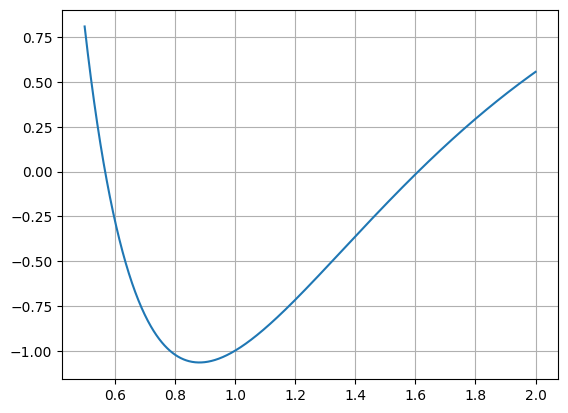

In [12]:
funcion_2= lambda x: -8*np.exp(1-x) + 7/x
ejercicio2= metodos_numericos(funcion_2)
ejercicio2.graficar(0.5,2,1000)

In [14]:
ejercicio2.regula_falsi(1,2,5*10**-8)

,ak,bk,ck,fCk,Bk_Ak
0,1.0000000000000000000000000000000000000000,2.0000000000000000000000000000000000000000,1.6422754140281408119506068032933399081230,0.0536270200236987903963381540961563587189,1.0000000000000000000000000000000000000000
1,1.0000000000000000000000000000000000000000,1.6422754140281408119506068032933399081230,1.6095851775077809620029256620910018682480,0.0003361293013686150743524194695055484772,0.3577245859718591880493931967066600918770
2,1.0000000000000000000000000000000000000000,1.6095851775077809620029256620910018682480,1.6093803469175038678429245919687673449516,-0.0000011871004019781139504630118608474731,0.0326902365203598499476811412023380398750
3,1.6093803469175038678429245919687673449516,1.6095851775077809620029256620910018682480,1.6093810677673492381956066310522146522999,0.0000000000729105664731832803227007389069,0.6093803469175038678429245919687673449516
4,1.6093803469175038678429245919687673449516,1.6093810677673492381956066310522146522999,1.6093810677230779848656538888462819159031,-0.0000000000000008881784197001252323389053,0.0002041097404317238073190310387872159481
5,1.6093810677230779848656538888462819159031,1.6093810677673492381956066310522146522999,1.6093810677230784289548637389088980853558,0.0000000000000000000000000000000000000000,0.0000007208055741170227292968775145709515


In [17]:
ejercicio2.biseccion(1,2,5*10**-8)

,ak,bk,ck,fCk,Bk_Ak
0,1.000000000000000000000000,2.00000000000000000000000,1.5000000000000000000000000,-0.1855786110344004313787991122808307409286,1.000000000000000000000000
1,1.500000000000000000000000,2.00000000000000000000000,1.7500000000000000000000000,0.2210675780718824867676630674395710229874,0.500000000000000000000000
2,1.500000000000000000000000,1.75000000000000000000000,1.6250000000000000000000000,0.0256008795403852573713265883270651102066,0.250000000000000000000000
3,1.500000000000000000000000,1.62500000000000000000000,1.5625000000000000000000000,-0.0782625978473836525495244131889194250107,0.125000000000000000000000
4,1.562500000000000000000000,1.62500000000000000000000,1.5937500000000000000000000,-0.0258627385590646241553258732892572879791,0.062500000000000000000000
5,1.593750000000000000000000,1.62500000000000000000000,1.6093750000000000000000000,-0.0000099929972074974671158997807651758194,0.031250000000000000000000
6,1.609375000000000000000000,1.62500000000000000000000,1.6171875000000000000000000,0.0128261279891219714954786468297243118286,0.015625000000000000000000
7,1.609375000000000000000000,1.61718750000000000000000,1.6132812500000000000000000,0.0064156839683553457120979146566241979599,0.007812500000000000000000
8,1.609375000000000000000000,1.61328125000000000000000,1.6113281250000000000000000,0.0032047426257904021440481301397085189819,0.003906250000000000000000
9,1.609375000000000000000000,1.61132812500000000000000,1.6103515625000000000000000,0.0015978482182896769359103927854448556900,0.001953125000000000000000


In [18]:
ejercicio2.secante(1,2,5*10**-8)

,Xn_1,Xn,Xnplus1,Xn_Xn_1,fx2
0,1.0000000000000000000000000000000000000000,2.0000000000000000000000000000000000000000,1.6422754140281408119506068032933399081230,1.0000000000000000000000000000000000000000,0.0536270200236987903963381540961563587189
1,2.0000000000000000000000000000000000000000,1.6422754140281408119506068032933399081230,1.6041624075116718284306216446566395461559,0.3577245859718591880493931967066600918770,-0.0086080992933794675536773866042494773865
2,1.6422754140281408119506068032933399081230,1.6041624075116718284306216446566395461559,1.6094340378718783313161111436784267425537,0.0381130065164689835199851586367003619671,0.0000872355478520603355718776583671569824
3,1.6041624075116718284306216446566395461559,1.6094340378718783313161111436784267425537,1.6093811504821522451180726420716382563114,0.0052716303602065028854894990217871963978,0.0000001362965402762483790866099298000336
4,1.6094340378718783313161111436784267425537,1.6093811504821522451180726420716382563114,1.6093810677217594840016090529388748109341,0.0000528873897260861980385016067884862423,-0.0000000000021724844145865063183009624481
5,1.6093811504821522451180726420716382563114,1.6093810677217594840016090529388748109341,1.6093810677230786509994686639402061700821,0.0000000827603927611164635891327634453773,0.0000000000000000000000000000000000000000


In [16]:
ejercicio2.regula_falsi(0.5,1,5*10**-8)

,ak,bk,ck,fCk,Bk_Ak
0,0.5,1.0000000000000000000000000000000000000000,0.7237919790632507677230478293495252728462,-0.8736892016407598049454463762231171131134,0.5000000000000000000000000000000000000000
1,0.5,0.7237919790632507677230478293495252728462,0.6076791307987552404057396415737457573414,-0.3240641131134349706144348601810634136200,0.2762080209367492322769521706504747271538
2,0.5,0.6076791307987552404057396415737457573414,0.5769155513054048389776085059565957635641,-0.0798141144083235332118420046754181385040,0.1161128482644955273173081877757795155048
3,0.5,0.5769155513054048389776085059565957635641,0.5700181990792644315391157761041540652514,-0.0175267109612047278233148972503840923309,0.0307635794933504014281311356171499937773
4,0.5,0.5700181990792644315391157761041540652514,0.5685356511680880187142861359461676329374,-0.0037494868987213436639649444259703159332,0.0068973522261404074384927298524416983128
5,0.5,0.5685356511680880187142861359461676329374,0.5682199508555292322142804550821892917156,-0.0007976180340865113294057664461433887482,0.0014825479111764128248296401579864323139
6,0.5,0.5682199508555292322142804550821892917156,0.5681528588441261407027127461333293467760,-0.0001694713669877501160954125225543975830,0.0003157003125587865000056808639783412218
7,0.5,0.5681528588441261407027127461333293467760,0.5681386066624296571347940698615275323391,-0.0000359986984754812056053197011351585388,0.0000670920114030915115677089488599449396
8,0.5,0.5681386066624296571347940698615275323391,0.5681355793829176992204565976862795650959,-0.0000076463417837402403165469877421855927,0.0000142521816964835679186762718018144369
9,0.5,0.5681355793829176992204565976862795650959,0.5681349363764659488040820178866852074862,-0.0000016241106344239142345031723380088806,0.0000030272795119579143374721752479672432


In [19]:
ejercicio2.biseccion(0.5,1,5*10**-8)

,ak,bk,ck,fCk,Bk_Ak
0,0.500000000000000000000000,1.000000000000000000000,0.7500000000000000000000000,-0.9388700001685972296172622009180486202240,0.500000000000000000000000
1,0.500000000000000000000000,0.750000000000000000000,0.6250000000000000000000000,-0.4399313169456107175392389763146638870239,0.250000000000000000000000
2,0.500000000000000000000000,0.625000000000000000000,0.5625000000000000000000000,0.0538020553713796090278265182860195636749,0.125000000000000000000000
3,0.562500000000000000000000,0.625000000000000000000,0.5937500000000000000000000,-0.2199487157904567169453002861700952053070,0.062500000000000000000000
4,0.562500000000000000000000,0.593750000000000000000,0.5781250000000000000000000,-0.0904351761425044031739162164740264415741,0.031250000000000000000000
5,0.562500000000000000000000,0.578125000000000000000,0.5703125000000000000000000,-0.0202450422663282836310827406123280525208,0.015625000000000000000000
6,0.562500000000000000000000,0.570312500000000000000,0.5664062500000000000000000,0.0162848372850046274606938823126256465912,0.007812500000000000000000
7,0.566406250000000000000000,0.570312500000000000000,0.5683593750000000000000000,-0.0021020507279985167770064435899257659912,0.003906250000000000000000
8,0.566406250000000000000000,0.568359375000000000000,0.5673828125000000000000000,0.0070607242069851139376623905263841152191,0.001953125000000000000000
9,0.567382812500000000000000,0.568359375000000000000,0.5678710937500000000000000,0.0024716923235956755888764746487140655518,0.000976562500000000000000


In [20]:
ejercicio2.secante(0.5,1,5*10**-8)

,Xn_1,Xn,Xnplus1,Xn_Xn_1,fx2
0,0.5000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000,0.7237919790632507677230478293495252728462,0.5000000000000000000000000000000000000000,-0.8736892016407598049454463762231171131134
1,1.0000000000000000000000000000000000000000,0.7237919790632507677230478293495252728462,-1.1867332367830243367023967948625795543194,0.2762080209367492322769521706504747271538,-77.1471176208921320949229993857443332672119
2,0.7237919790632507677230478293495252728462,-1.1867332367830243367023967948625795543194,0.7456764712794936578177384944865480065346,1.9105252158462751044254446242121048271656,-0.9292624384373642243417634745128452777863
3,-1.1867332367830243367023967948625795543194,0.7456764712794936578177384944865480065346,0.7692367742173751299361583733116276562214,1.9324097080625179945201352893491275608540,-0.9765588190462217710319237085059285163879
4,0.7456764712794936578177384944865480065346,0.7692367742173751299361583733116276562214,0.2827720317317762299680339310725685209036,0.0235603029378814721184198788250796496868,8.3649543115897024847527063684538006782532
5,0.7692367742173751299361583733116276562214,0.2827720317317762299680339310725685209036,0.7183819043707144746946369195939041674137,0.4864647424855988999681244422390591353178,-0.8580592467165164549669498228468000888824
6,0.2827720317317762299680339310725685209036,0.7183819043707144746946369195939041674137,0.6778551202761361471615941809432115405798,0.4356098726389382447266029885213356465101,-0.7139872077539415329283656319603323936462
7,0.7183819043707144746946369195939041674137,0.6778551202761361471615941809432115405798,0.4770138909627137935309804106509545817971,0.0405267840945783275330427386506926268339,1.1781620689744229935058683622628450393677
8,0.6778551202761361471615941809432115405798,0.4770138909627137935309804106509545817971,0.6020693087215092109687475385726429522038,0.2008412293134223536306137702922569587827,-0.2833583478445369507880968740209937095642
9,0.4770138909627137935309804106509545817971,0.6020693087215092109687475385726429522038,0.5778236696203689071182907355250790715218,0.1250554177587954174377671279216883704066,-0.0877972410466014707708382047712802886963


In [21]:
funcion_3= lambda x: x**2 -4 *np.cos(x)
x=symbols('x')
funcion3_simbolica=  x**2 -4 *cos(x)
ejercicio3=metodos_numericos(funcion_3,funcion3_simbolica)
ejercicio3.newton_rhapson(1,5*10**-8,x)


,X_0,X_1,X0__X1,FX0
0,1.0000000000000000000000000000000000000000,1.2164059522388492862177145070745609700680,0.2164059522388492862177145070745609700680,-1.1612092234725590600419309339486062526703
1,1.2164059522388492862177145070745609700680,1.2015991821219795809838615241460502147675,0.0148067701168697052338529829285107553005,0.0915686905445798338121221604524180293083
2,1.2015991821219795809838615241460502147675,1.2015383003810802264865742472466081380844,0.0000608817408993544972872768994420766830,0.0003734283764493806501150174881331622601
3,1.2015383003810802264865742472466081380844,1.2015382993405749889603839619667269289494,0.0000000010405052375261902852798812091351,0.0000000063818947904081824162858538329601


In [24]:
funcion_4 = lambda x: -8*np.exp(1-x)+7/x
s= symbols('s')
funcion4_simbolica= -8*exp(1-s)+7/s
ejercicio4=metodos_numericos(funcion_4,funcion4_simbolica)
ejercicio4.newton_rhapson(0.5,5*10**-8,s)

,X_0,X_1,X0__X1,FX0
0,0.5000000000000000000000000000000000000000,0.5547074450200019102297233075660187751055,0.0547074450200019102297233075660187751055,0.8102298343989744466853153426200151443481
1,0.5547074450200019102297233075660187751055,0.5675404590038755081593535578576847910881,0.0128330139838735979296302502916660159826,0.1316902218206852381854332634247839450836
2,0.5675404590038755081593535578576847910881,0.5681335577502598654930920929473359137774,0.0005930987463843573337385350896511226892,0.0055774351694442003690710407681763172150
3,0.5681335577502598654930920929473359137774,0.5681347629622321981912591581931337714195,0.0000012052119723326981670652457978576422,0.0000112878329829868562228512018918991089
4,0.5681347629622321981912591581931337714195,0.5681347629671968935127779332106001675129,0.0000000000049646953215187750174663960934,0.0000000000464979166281409561634063720703


In [34]:
ejercicio4.newton_rhapson(1.5,5*10**-8,s)

,X_0,X_1,X0__X1,FX0
0,1.5000000000000000000000000000000000000000,1.6065849000010490321699307969538494944572,0.1065849000010490321699307969538494944572,-0.1855786110344004313787991122808307409286
1,1.6065849000010490321699307969538494944572,1.6093787279280238333711849918472580611706,0.0027938279269748012012541948934085667133,-0.0046088966523152308241151331458240747452
2,1.6093787279280238333711849918472580611706,1.6093810677214313020755298566655255854130,0.0000023397934074687043448648182675242424,-0.0000038534288595570842517190612852573395
3,1.6093810677214313020755298566655255854130,1.6093810677230784289548637389088980853558,0.0000000000016471268793338822433724999428,-0.0000000000027124968937641824595630168915


In [2]:
def fcomp1(x: Num)->Num:
    return 16*x**4+70*x**3-169*x**2-580*x+75
prueba2_compleja=metodos_numericos(fcomp1)
pd.set_option("display.precision", 10)
prueba2_compleja.muller((9,-5,90),0.00000000000000001)


,x_1,x_2,x_3,f_x3
0,90.0000000000+0.0000000000j,42.4656805397+73.7699747248j,42.4656805397+73.7699747248j,-4.5882109302e+08-7.3079326544e+08j
1,42.4656805397+73.7699747248j,-4.6719685863+59.8849593902j,-4.6719685863+59.8849593902j,2.0238376102e+08+4.9124803549e+07j
2,-4.6719685863+59.8849593902j,-23.1273504043+50.8533986438j,-23.1273504043+50.8533986438j,-9.1537433664e+06+1.5126909354e+08j
3,-23.1273504043+50.8533986438j,-17.6087842944+57.6388589919j,-17.6087842944+57.6388589919j,9.1664906642e+07+1.8631934060e+08j
4,-17.6087842944+57.6388589919j,-2.0516849246+48.6451411784j,-2.0516849246+48.6451411784j,9.0057225407e+07+7.0788651811e+06j
5,-2.0516849246+48.6451411784j,-11.9403578882+42.6888619659j,-11.9403578882+42.6888619659j,3.3258903183e+07+5.0777604343e+07j
6,-11.9403578882+42.6888619659j,-11.1005034965+34.4473155333j,-11.1005034965+34.4473155333j,1.1591750110e+07+2.4163284322e+07j
7,-11.1005034965+34.4473155333j,-5.8390587931+30.9604279171j,-5.8390587931+30.9604279171j,1.2903356092e+07+8.8832635743e+06j
8,-5.8390587931+30.9604279171j,-6.4369080081+25.4463496163j,-6.4369080081+25.4463496163j,5.1231720192e+06+5.4621556883e+06j
9,-6.4369080081+25.4463496163j,-6.6773557042+20.5897404863j,-6.6773557042+20.5897404863j,1.7344518279e+06+2.9542215126e+06j


In [23]:
prueba2_compleja.biseccion(-3,0,0.000000000000001)

,ak,bk,ck,fCk,Bk_Ak
0,-3.0000000000,0.0000000000,-1.5000000000,4.0950000000e+02,3.0000000000e+00
1,-3.0000000000,-1.5000000000,-2.2500000000,1.3715625000e+02,1.5000000000e+00
2,-3.0000000000,-2.2500000000,-2.6250000000,-7.3476562500e+01,7.5000000000e-01
3,-2.6250000000,-2.2500000000,-2.4375000000,3.5704833984e+01,3.7500000000e-01
4,-2.6250000000,-2.4375000000,-2.5312500000,-1.8135910034e+01,1.8750000000e-01
5,-2.5312500000,-2.4375000000,-2.4843750000,9.0001459122e+00,9.3750000000e-02
6,-2.5312500000,-2.4843750000,-2.5078125000,-4.5174130797e+00,4.6875000000e-02
7,-2.5078125000,-2.4843750000,-2.4960937500,2.2544196881e+00,2.3437500000e-02
8,-2.5078125000,-2.4960937500,-2.5019531250,-1.1282875983e+00,1.1718750000e-02
9,-2.5019531250,-2.4960937500,-2.4990234375,5.6387511456e-01,5.8593750000e-03


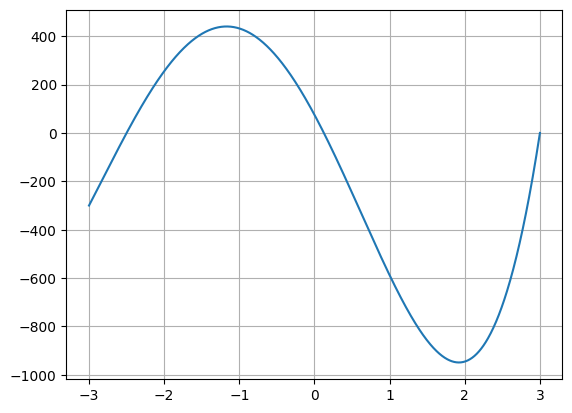

In [6]:
prueba2_compleja.graficar(-3,3,1000)

In [15]:
def fcomp(x: Num)->Num:
    return x**2+2
prueba_compleja=metodos_numericos(fcomp)
pd.set_option("display.precision", 20)
prueba_compleja.muller((23.2,3,4),0.000000000001)

,x_1,x_2,x_3,f_x3
0,4.00000000000000000000+0.00000000000000000000j,3.32130024417047575724+0.00000000000000000000j,3.32130024417047575724+0.00000000000000000000j,13.03103531192686226348+0.00000000000000000000j
1,3.32130024417047575724+0.00000000000000000000j,0.16065012208522855275+1.74393982628111698929j,0.16065012208522855275+1.74393982628111698929j,-1.01551765596341381226+0.56032829200270739545j
2,0.16065012208522855275+1.74393982628111698929j,0.32730083190582526242+1.55458373420141571231j,0.32730083190582526242+1.55458373420141571231j,-0.30960475207737259140+1.01763309894277531598j
3,0.32730083190582526242+1.55458373420141571231j,0.31549186798753486860+1.27892036285502075366j,0.31549186798753486860+1.27892036285502075366j,0.46389782424104608616+0.80697794856885285419j
4,0.31549186798753486860+1.27892036285502075366j,0.05081171928074168509+1.40832816503011581943j,0.05081171928074168509+1.40832816503011581943j,0.01919361039917166778+0.14311915075334458169j
5,0.05081171928074168509+1.40832816503011581943j,0.00240460071656260765+1.40941909530817532925j,0.00240460071656260765+1.40941909530817532925j,0.01354359588529052694+0.00677818033303012081j
6,0.00240460071656260765+1.40941909530817532925j,-0.00065843608321029161+1.41409016857386160559j,-0.00065843608321029161+1.41409016857386160559j,0.00034942868082343814-0.00186217598380390877j
7,-0.00065843608321029161+1.41409016857386160559j,-0.00000112908490225840+1.41422579993542241183j,-0.00000112908490225840+1.41422579993542241183j,-0.00003461320171060933-0.00000319356199818278j
8,-0.00000112908490225840+1.41422579993542241183j,0.00000001236540980807+1.41421354251336950369j,0.00000001236540980807+1.41421354251336950369j,0.00000005617178633344+0.00000003497466001859j
9,0.00000001236540980807+1.41421354251336950369j,0.00000000000408495781+1.41421356237683926160j,0.00000000000408495781+1.41421356237683926160j,-0.00000000001059019539+0.00000000001155400547j


In [ ]:
from typing import *
from cmath import sqrt 
pd.set_option("display.precision", 10)
Num = Union[float, complex]  #Definimos la estructura Num la cual es la union de flotantes y complejos
Func = Callable[[Num], Num]  #Definimos la estructura Func la cual es una funcion que recibe y regresa argumentos de tipo Num
def div_diff(f: Func, xs: list[Num]):  #Creamos una funcion para la diferencia dividida
    if len(xs) == 2:
        a, b = xs
        return (f(a) - f(b)) / (a - b)
    else:
        return (div_diff(f, xs[1:]) - div_diff(f, xs[0:-1])) / (xs[-1] - xs[0])
def mullers_method(f: Func, xs: tuple, tol: np.float64) -> pd.DataFrame:  #Creamos la función para el metodo de Muller
    """
    Método de Müller
    Recibe los siguientes parámetros y aplica el método de Müller sobre la función argumento
    f- Objeto Func que representa la función objetivo
    xs - Aproximaciones iniciales en forma de tupla
    tol - Tolerancia deseada del método
    Regresa:
    Data Frame de pandas con los puntos como su siguiente calculados por la relación de recurrencia del método como la función evaluada en dichos puntos
    """
    x0, x1, x2 = xs
    X0: list=[]
    X1: list=[]
    X2: list=[]
    X3: list=[]
    fX3: list=[]
    while (True):
        w = div_diff(f, (x2, x1)) + div_diff(f, (x2, x0)) - div_diff(f, (x2, x1))
        s_delta = sqrt(w ** 2 - 4 * f(x2) * div_diff(f, (x2, x1, x0)))
        denoms = [w + s_delta, w - s_delta]
        x3 = x2 - 2 * f(x2) / max(denoms, key=abs)
        x0, x1, x2 = x1, x2, x3
        X0.append(x0);X1.append(x1);X2.append(x2),X3.append(x3);fX3.append(f(x3))
        if(abs(f(x3))<tol):
          break
    return pd.DataFrame(dict(x_1=X1,x_2=X2,x_3=X3,f_x3=fX3))
def f_example(x: Num) -> Num:
    return x**2 +1
root = mullers_method(f_example, (23, 2, 2.25), 0.000000001)
root

,x_1,x_2,x_3,f_x3
0,2.2500000000+0.0000000000j,2.0075734401+0.0000000000j,2.0075734401+0.0000000000j,5.0303511175e+00+0.0000000000e+00j
1,2.0075734401+0.0000000000j,0.0037867201+1.0075663244j,0.0037867201+1.0075663244j,-1.5175558740e-02+7.6307432259e-03j
2,0.0037867201+1.0075663244j,0.0081481007+1.0022513749j,0.0081481007+1.0022513749j,-4.4414270169e-03+1.6332890227e-02j
3,0.0081481007+1.0022513749j,0.0067011856+0.9948574398j,0.0067011856+0.9948574398j,1.0303580403e-02+1.3333448656e-02j
4,0.0067011856+0.9948574398j,0.0000497281+0.9999771607j,0.0000497281+0.9999771607j,4.5680499032e-05+9.9453856014e-05j
5,0.0000497281+0.9999771607j,-0.0000000350+0.9999997728j,-0.0000000350+0.9999997728j,4.5442429908e-07-6.9949092619e-08j
6,-0.0000000350+0.9999997728j,-0.0000000007+1.0000000007j,-0.0000000007+1.0000000007j,-1.4018506356e-09-1.3509185829e-09j
7,-0.0000000007+1.0000000007j,0.0000000000+1.0000000000j,0.0000000000+1.0000000000j,-1.7763568394e-14+5.0283742917e-14j


In [17]:
f=lambda x: x**3+2*x**2-3*x-1
x=symbols('x')
fsymb=x**3+2*x**2-3*x-1 
met=metodos_numericos(f,fsymb)

In [18]:
df=met.newton_rhapson(2,0.000001,x)

In [19]:
pd.set_option("display.precision", 30)
df

,X_0,X_1,X0__X1,FX0
0,2.000000000000000000000000000000,1.470588235294117751550402317662,0.529411764705882248449597682338,9.000000000000000000000000000000
1,1.470588235294117751550402317662,1.247132678773134051297688529303,0.223455556520983700252713788359,2.093832688784857509745052084327
2,1.247132678773134051297688529303,1.200698732423871595287323543744,0.046433946349262456010364985559,0.308997039524917305186590965604
3,1.200698732423871595287323543744,1.198694926456477238829734233150,0.002003805967394356457589310594,0.012278976846435973868665314512
4,1.198694926456477238829734233150,1.198691243528429595244233496487,0.000003682928047643585500736663,0.000022485705759578422657796182
5,1.198691243528429595244233496487,1.198691243515997095769876068516,0.000000000012432499474357427971,0.000000000075904615925992402481


In [ ]:
num=1/2 * (fsymb.diff(x).diff(x))/fsymb.diff(x)
num=lambdify(x,num)

In [ ]:
num(1.1986912435)

0.9165856863257986

In [ ]:
s=symbols('s')
fsymb=(s-1)**12
f=lambdify(s,fsymb)
met2=metodos_numericos(f,fsymb)
met2.newton_rhapson(1.1,1*10**-10,s)
#Converge lento puesto que el término delta es muy muy pequeño.


,X_0,X_1,X0__X1,FX0
0,1.100000000000000088817841970013,1.091666666666666785090455960017,0.008333333333333303727386009996,1.000000000000010683151409667944e-12
1,1.091666666666666785090455960017,1.084027777777777812318049655005,0.007638888888888972772406305012,3.519956280141425661683716837130e-13
2,1.084027777777777812318049655005,1.077025462962962976121161773335,0.007002314814814836196887881670,1.239009221410673940396940339721e-13
3,1.077025462962962976121161773335,1.070606674382716061444398292224,0.006418788580246914676763481111,4.361258290057559260168084188487e-14
4,1.070606674382716061444398292224,1.064722784850823167346334230388,0.005883889531892894098064061836,1.535143850740672420092817418182e-14
...,...,...,...,...
206,1.000000001642693314707344143244,1.000000001505802149637247566716,0.000000000136891165070096576528,3.860805082476003170652722503533e-106
207,1.000000001505802149637247566716,1.000000001380318526145174473641,0.000000000125483623492073093075,1.358985908460658401988088352010e-106
208,1.000000001380318526145174473641,1.000000001265292093322045730019,0.000000000115026432823128743621,4.783566366064218909259202358711e-107
209,1.000000001265292093322045730019,1.000000001159851104048925662937,0.000000000105440989273120067082,1.683796220093601811564766543528e-107


In [ ]:
print((1.0000000265944127	 - 1)**12)
print(12*(1.0000000265944127	 - 1)**11)
print(((1.0000000265944127	 - 1)**12)/(12*(1.0000000265944127	 - 1)**11))

1.2516555871736973e-91
5.647752868732284e-83
2.216201056004507e-09


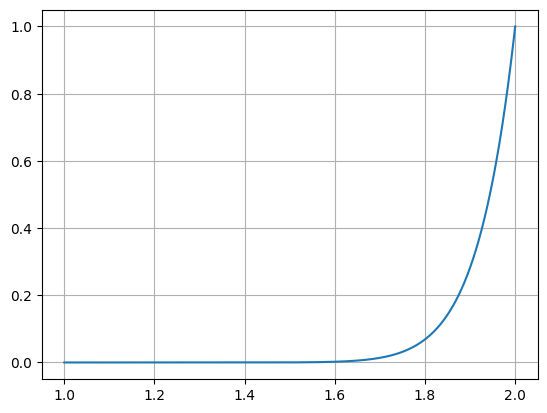

In [ ]:
met2.graficar(1,2,100000)

In [ ]:
#division por 0
d=symbols('d')
fsimbolica=2*d**3-9*d**2+12*d+15
met3=metodos_numericos(lambdify(d,fsimbolica),fsimbolica)
#met3.newton_rhapson(3,1*10**-10,d)

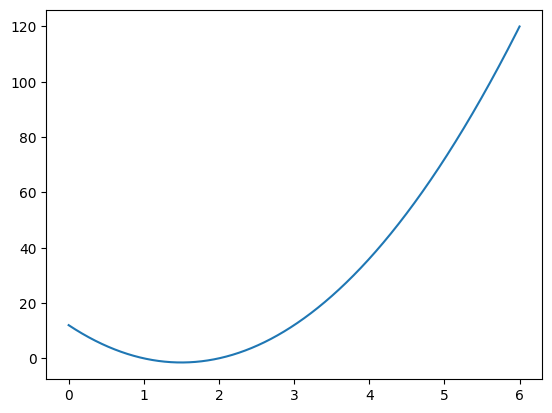

In [ ]:
f=lambda x: 6*x**2-18*x+12
x=np.linspace(0,6,10000)
y=f(x)
plt.plot(x,y)
#Tiene un minimo en el intervalo

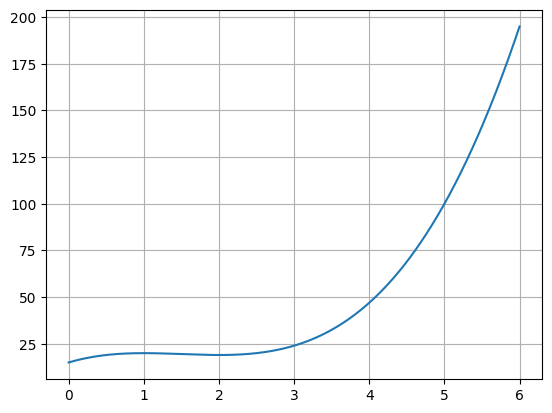

In [ ]:
met3.graficar(0,6,1000000)

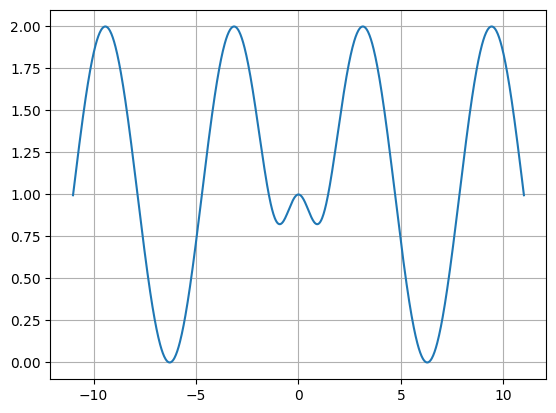

In [ ]:
q=symbols('q')
fsim=exp(-q**2)-cos(q)+1
met4=metodos_numericos(lambdify(q,fsim),fsim)
met4.graficar(-11,11,1000)

In [ ]:
#division por 0 en segunda iteracion
#met4.newton_rhapson(0,0.00001,q)
pd.set_option("display.precision", 30)
met4.newton_rhapson(-1,0.000000001,q)

,X_0,X_1,X0__X1,FX0
0,-1.000000000000000000000000000000,6.828594039903904899802000727504,7.828594039903904899802000727504,0.827577135303302569013794709463
1,6.828594039903904899802000727504,6.548922208673126910127848532284,0.279671831230777989674152195221,0.145084675081861957934847850993
2,6.548922208673126910127848532284,6.415266309142828582423589978134,0.133655899530298327704258554149,0.035100762466165891240166274656
3,6.415266309142828582423589978134,6.349129631843815957381593761966,0.066136677299012625041996216169,0.008710022008707187304854535626
4,6.349129631843815957381593761966,6.316145515602987536851742333965,0.032984116240828420529851428000,0.002173539142284800201182504154
5,6.316145515602987536851742333965,6.299663919264285816268511553062,0.016481596338701720583230780903,0.000543138495963662367577162726
6,6.299663919264285816268511553062,6.291424426771913047673479013611,0.008239492492372768595032539451,0.000135769255792622943771960631
7,6.291424426771913047673479013611,6.287304843671546628058877104195,0.004119583100366419614601909416,0.000033941353824069387442458057
8,6.287304843671546628058877104195,6.285245072512594788349815644324,0.002059771158951839709061459871,0.000008485278454324476167438401
9,6.285245072512594788349815644324,6.284215189481974661589447350707,0.001029883030620126760368293617,0.000002121315863530572935432596


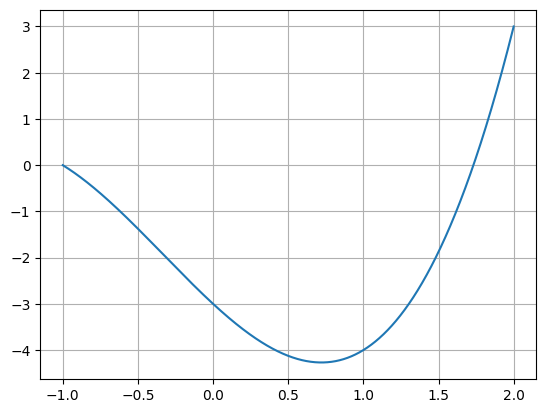

In [ ]:
f=lambda x: x**3+x**2-3*x-3
g=lambda x: (-3+x**2+x**3)/3
pt=metodos_numericos(f)
pt.graficar(-1,2,10000)

In [ ]:
pd.set_option("display.precision", 30)
pt.punto_fijo(1,g,0.0000001)

,p0,pn,Fpn,Gpn
0,1.000000000000000000000000000000,-0.333333333333333314829616256247,-1.925925925925926041060165516683,-0.975308641975308643345954351389
1,-0.333333333333333314829616256247,-0.975308641975308643345954351389,-0.050586988960204415377575060120,-0.992170971628710152145913525601
2,-0.975308641975308643345954351389,-0.992170971628710152145913525601,-0.015780164243055949668814719189,-0.997431026376395468702185098664
3,-0.992170971628710152145913525601,-0.997431026376395468702185098664,-0.005151129543902843721525641740,-0.999148069557696416609360312577
4,-0.997431026376395468702185098664,-0.999148069557696416609360312577,-0.001705311837245648831640210119,-0.999716506836778262545806228445
5,-0.999148069557696416609360312577,-0.999716506836778262545806228445,-0.000567147040406723590422188863,-0.999905555850247207416714445571
6,-0.999716506836778262545806228445,-0.999905555850247207416714445571,-0.000188906138057998163048978313,-0.999968524562933169796963284170
7,-0.999905555850247207416714445571,-0.999968524562933169796963284170,-0.000062952855508502381098878686,-0.999989508848102670590662910399
8,-0.999968524562933169796963284170,-0.999989508848102670590662910399,-0.000020982523921908580177841941,-0.999996503022743343791489678551
9,-0.999989508848102670590662910399,-0.999996503022743343791489678551,-0.000006993978971081560302991420,-0.999998834349067000637489854853


In [ ]:
g2= lambda x: np.sqrt((3+3*x-x**2)/x)
pd.set_option("display.precision", 30)
pt.punto_fijo(1,g2,0.00001)

,p0,pn,Fpn,Gpn
0,1.000000000000000000000000000000,2.236067977499789805051477742381,6.472135954999583162816634285264,1.451059202444918705410259462951
1,2.236067977499789805051477742381,1.451059202444918705410259462951,-2.192293997417304574071295064641,1.901682431658618721570519483066
2,1.451059202444918705410259462951,1.901682431658618721570519483066,1.788585649813104083705184166320,1.635808066692532092289980027999
3,1.901682431658618721570519483066,1.635808066692532092289980027999,-0.854349658414580659382409066893,1.788336635491102777351102304237
4,1.635808066692532092289980027999,1.788336635491102777351102304237,0.552503109711888207300489739282,1.699764652977454826299208434648
5,1.788336635491102777351102304237,1.699764652977454826299208434648,-0.299134259639371791195117111783,1.750767137020023067606189215439
6,1.699764652977454826299208434648,1.750767137020023067606189215439,0.179310318452980510528504964896,1.721269132175782923255269452056
7,1.750767137020023067606189215439,1.721269132175782923255269452056,-0.101319856021645726684710098198,1.738283890790179420093863882357
8,1.721269132175782923255269452056,1.738283890790179420093863882357,0.059231503886032932371108472580,1.728454854472468049664257705444
9,1.738283890790179420093863882357,1.728454854472468049664257705444,-0.033952390311310587378557102056,1.734127846316689147698753004079


In [ ]:
g3= lambda x: -1 + (3*x+3)/x**2
pd.set_option("display.precision", 30)
pt.punto_fijo(1,g3,0.00001)

,p0,pn,Fpn,Gpn
0,1.000000000000000000000000000000e+00,5.000000000000000000000000000000e+00,1.320000000000000000000000000000e+02,-2.800000000000000266453525910038e-01
1,5.000000000000000000000000000000e+00,-2.800000000000000266453525910038e-01,-2.103551999999999644330728187924e+00,2.655102040816326436356575868558e+01
2,-2.800000000000000266453525910038e-01,2.655102040816326436356575868558e+01,1.933962294622138506383635103703e+04,-8.827544117012811053513132719672e-01
3,2.655102040816326436356575868558e+01,-8.827544117012811053513132719672e-01,-2.603725127889093826638600148726e-01,-5.486245114978964831919938660576e-01
4,-8.827544117012811053513132719672e-01,-5.486245114978964831919938660576e-01,-1.218267474220187107647461743909e+00,3.498925607170814799928848515265e+00
...,...,...,...,...
459,-9.386952419185409235424799589964e-01,-7.912789722036379647107651180704e-01,-4.954781700610735306611331907334e-01,6.495780484838675761238846462220e-05
460,-7.912789722036379647107651180704e-01,6.495780484838675761238846462220e-05,-3.000194869194754865304730628850e+00,7.110281314636024236679077148438e+08
461,6.495780484838675761238846462220e-05,7.110281314636024236679077148438e+08,3.594680963304304977106698240000e+26,-9.999999957807576000945459782088e-01
462,7.110281314636024236679077148438e+08,-9.999999957807576000945459782088e-01,-8.438485021855512968613766133785e-09,-9.999999873422725782390330095950e-01


In [ ]:
g4=lambda x: x- (x**3+x**2-3*x-3)/(3*x**2+2*x-3)
pd.set_option("display.precision", 30)
pt.punto_fijo(1,g4,0.00001)

,p0,pn,Fpn,Gpn
0,1.000000000000000000000000000000,3.000000000000000000000000000000,24.000000000000000000000000000000,2.200000000000000177635683940025
1,3.000000000000000000000000000000,2.200000000000000177635683940025,5.888000000000001676880856393836,1.830150753768844396063286694698
2,2.200000000000000177635683940025,1.830150753768844396063286694698,0.989001222876588315102708293125,1.737795453142821466840928223974
3,1.830150753768844396063286694698,1.737795453142821466840928223974,0.054572577966994550990875723073,1.732072291544954234510100832267
4,1.737795453142821466840928223974,1.732072291544954234510100832267,0.000203329392602036307380330982,1.732050807871055475573029980296
5,1.732072291544954234510100832267,1.732050807871055475573029980296,0.000000002859844805414013535483,1.732050807568877415221209048468
6,1.732050807871055475573029980296,1.732050807568877415221209048468,0.000000000000001776356839400250,1.732050807568877193176604123437
